## Project 1 by Amy and Renee ##

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans, MeanShift 
from sklearn.model_selection import train_test_split
%matplotlib inline

In [70]:
data = pd.read_csv('/Users/wangxinyu/Downloads/CS 250/sephora_website_dataset.csv') 
data.head(5)

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0


In [3]:
data.shape

(9168, 21)

In [4]:
data.describe()

,id,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
count,9.168000e+03,9168.000000,9168.000000,9.168000e+03,9168.000000,9168.00000,9168.000000,9168.000000,9168.000000,9168.000000
mean,1.962952e+06,3.990020,282.139180,1.627859e+04,50.063237,51.82359,0.234839,0.264725,0.091841,0.000327
std,3.859714e+05,1.007707,890.642028,4.260651e+04,47.164989,49.45902,0.423921,0.441211,0.288817,0.018087
min,5.000000e+01,0.000000,0.000000,0.000000e+00,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000
25%,1.819453e+06,4.000000,10.000000,1.600000e+03,24.000000,25.00000,0.000000,0.000000,0.000000,0.000000
50%,2.072354e+06,4.000000,46.000000,4.800000e+03,35.000000,35.00000,0.000000,0.000000,0.000000,0.000000
75%,2.230591e+06,4.500000,210.000000,1.380000e+04,59.000000,60.00000,0.000000,1.000000,0.000000,0.000000
max,2.359685e+06,5.000000,19000.000000,1.300000e+06,549.000000,549.00000,1.000000,1.000000,1.000000,1.000000


## Introduction 

We chose this dataset because we love beauty products. We come from different sides of the world and are interested in different types of makeup and bauty, but studing in the United States brought us together and we chose to do a data analyis on one of the biggest beauty stores in the United States: Sephora. Not only does this store sell makeup, but a large variety of things such as perfume, cologne, face moisturizers, beauty/makeup tools, hair care and many more. We will analyze the dataset and provide results regarding the largest category: perfume. 

https://www.kaggle.com/raghadalharbi/all-products-available-on-sephora-website

## Data Cleaning ##

In [5]:
data.isna().sum()

id                        0
brand                     0
category                  0
name                      0
size                      0
rating                    0
number_of_reviews         0
love                      0
price                     0
value_price               0
URL                       0
MarketingFlags            0
MarketingFlags_content    0
options                   0
details                   0
how_to_use                0
ingredients               0
online_only               0
exclusive                 0
limited_edition           0
limited_time_offer        0
dtype: int64

In [6]:
data['category'].unique()

array(['Fragrance', 'Cologne', 'Perfume', 'Body Mist & Hair Mist',
       'Body Lotions & Body Oils', 'Body Sprays & Deodorant',
       'Perfume Gift Sets', 'no category', 'Rollerballs & Travel Size',
       'Lip Balm & Treatment', 'Lotions & Oils', 'Eye Palettes',
       'Highlighter', 'Cheek Palettes', 'Lipstick', 'Face Serums',
       'Moisturizers', 'Value & Gift Sets', 'Eye Creams & Treatments',
       'Face Sunscreen', 'Lip Balms & Treatments', 'Mini Size',
       'Face Masks', 'Face Wash & Cleansers', 'Decollete & Neck Creams',
       'Face Oils', 'Hand Cream & Foot Cream', 'Face Primer',
       'Color Correct', 'Mists & Essences', 'Tinted Moisturizer',
       'Concealer', 'Beauty Supplements', 'Facial Peels', 'Exfoliators',
       'Conditioner', 'Shampoo', 'Hair Styling Products',
       'Scalp & Hair Treatments', 'Hair Masks', 'Hair Spray', 'Hair Oil',
       'Hair Primers', 'Dry Shampoo', 'Hair', 'Hair Thinning & Hair Loss',
       'Hair Straighteners & Flat Irons', 'Hair Dry

In [7]:
vc = data['category'].value_counts()
vc.head(20)

Perfume                      665
Moisturizers                 451
Face Serums                  384
Value & Gift Sets            378
Face Wash & Cleansers        247
Face Masks                   230
Rollerballs & Travel Size    228
Hair Styling Products        224
Eye Palettes                 202
Lipstick                     191
Eye Creams & Treatments      191
Shampoo                      186
Face Brushes                 183
Highlighter                  169
Foundation                   163
Cologne                      158
Mini Size                    154
Mascara                      154
Conditioner                  147
Face Primer                  144
Name: category, dtype: int64

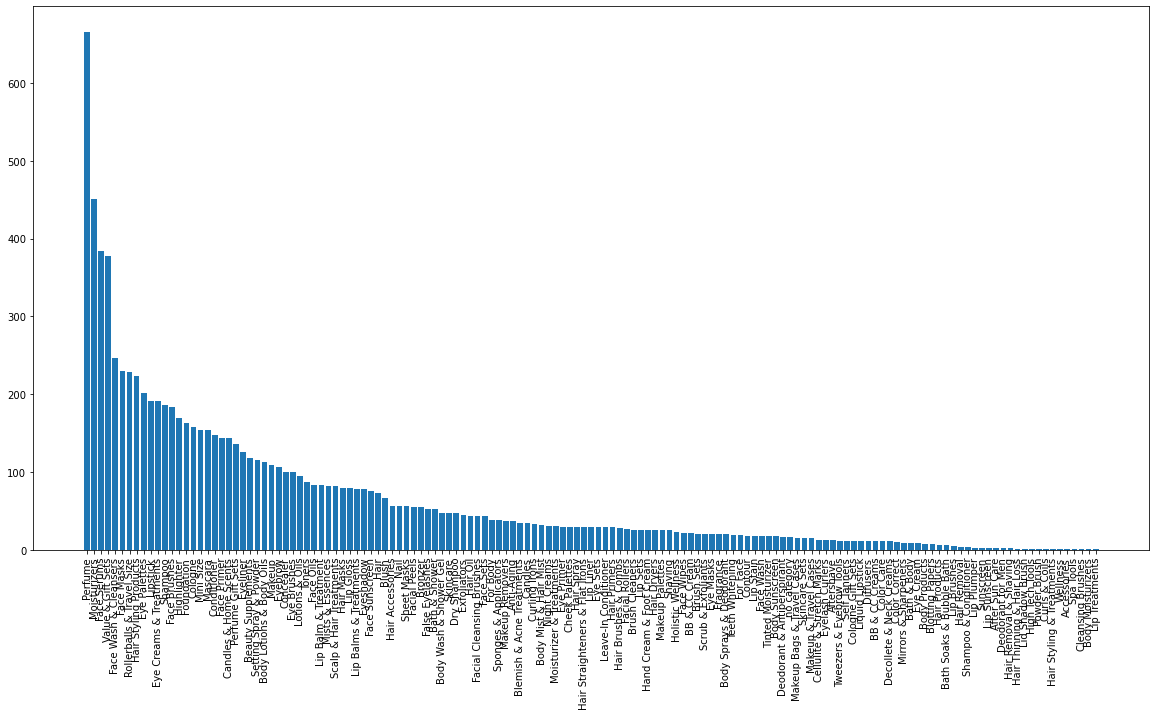

In [8]:
fig = plt.figure(figsize = [20,10])
plt.bar(vc.keys(),vc)
plt.xticks(rotation=90)
plt.show()

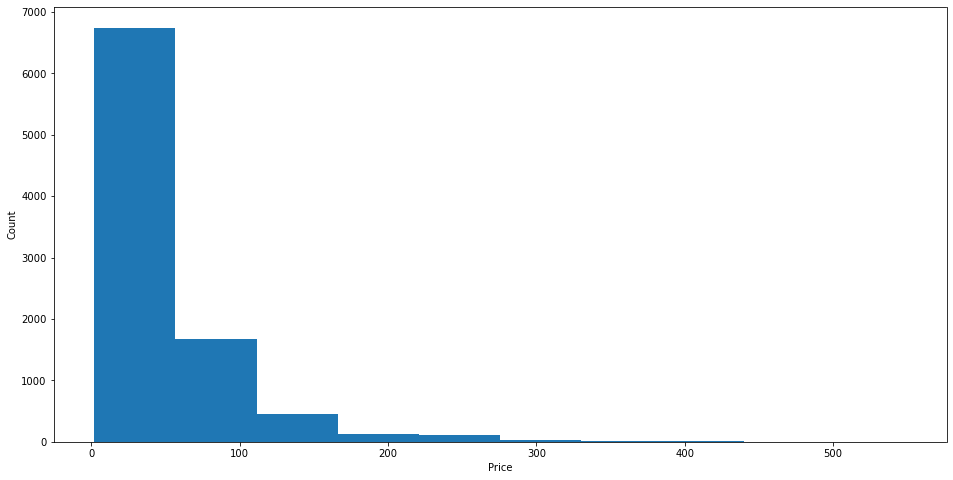

In [9]:
fig = plt.figure(figsize = [16,8])
plt.hist(data.price)
plt.xlabel('Price')  
plt.ylabel('Count') 
plt.show()

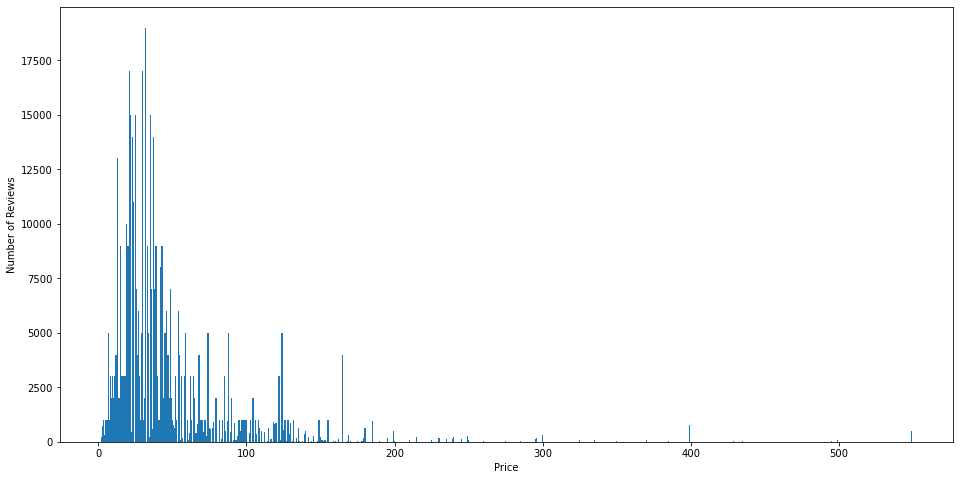

In [10]:
fig = plt.figure(figsize = [16,8])
plt.bar(data.price,data.number_of_reviews)
plt.xlabel('Price')  
plt.ylabel('Number of Reviews') 
plt.show()

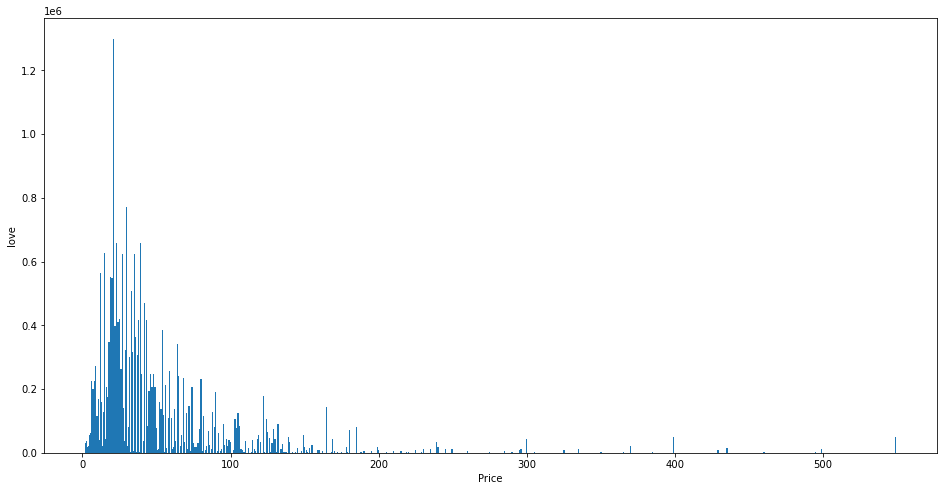

In [11]:
fig = plt.figure(figsize = [16,8])
plt.bar(data.price,data.love)
plt.xlabel('Price')  
plt.ylabel('love') 
plt.show()

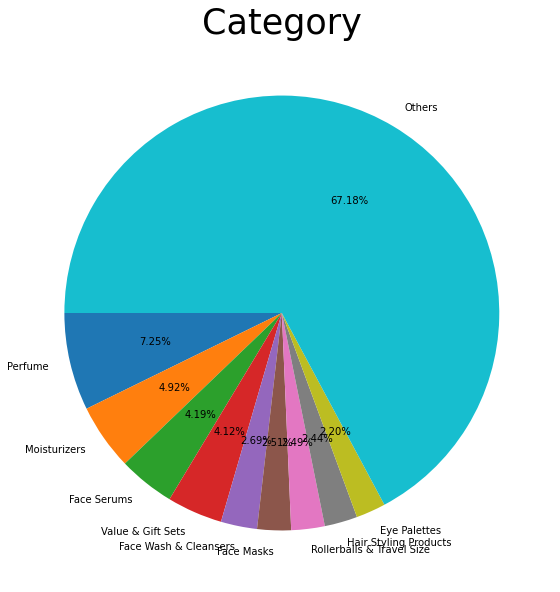

In [12]:
labels = 'Perfume', 'Moisturizers', 'Face Serums' , 'Value & Gift Sets', 'Face Wash & Cleansers','Face Masks','Rollerballs & Travel Size','Hair Styling Products','Eye Palettes','Others'
size = [665, 451, 384, 378, 247,230,228,224,202,6159]

f, ax = plt.subplots(1,1,figsize= (10,10))

ax.pie(size, labels = labels, autopct = '%1.2f%%', startangle = 180)
ax.set_title("Category", size = 35)
plt.show()

<AxesSubplot:xlabel='rating', ylabel='count'>

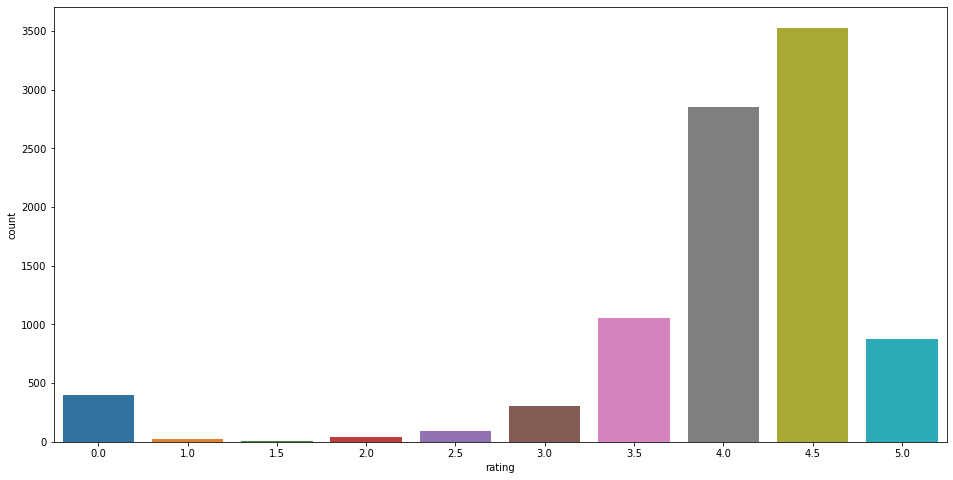

In [13]:
fig = plt.figure(figsize = [16,8])
sns.countplot(x='rating', data=data)

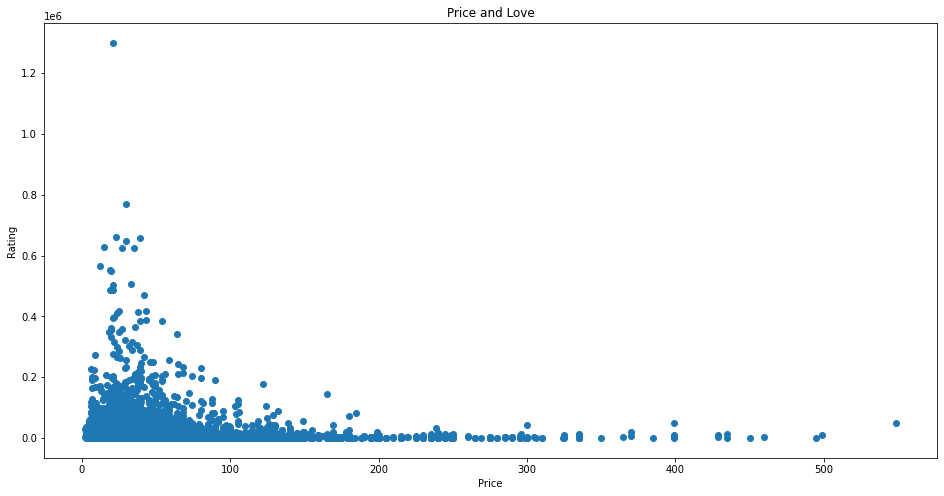

In [14]:
x = data.price
y = data.love
fig = plt.figure(figsize=[16,8])
plt.scatter(x,y)
plt.title('Price and Love')  
plt.xlabel('Price')  
plt.ylabel('Rating') 
plt.show()

## Method

In [83]:
data2 = pd.DataFrame({'Price':x,'love':y})

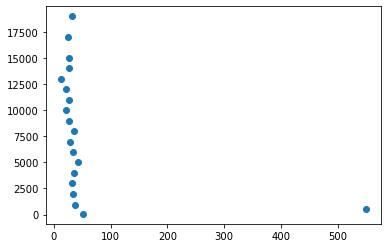

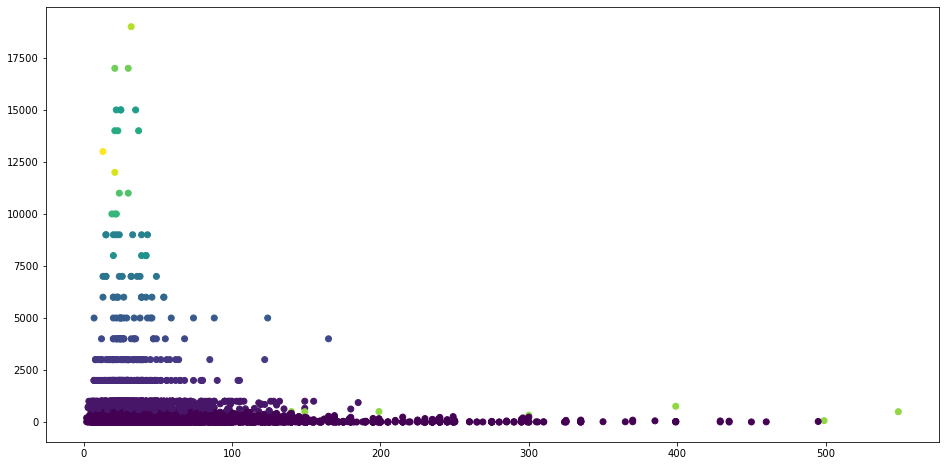

In [74]:
data2 = pd.DataFrame({'Price':x,'love':y})
m1 = MeanShift()
m1.fit(data2)
plt.scatter(m2.cluster_centers_[:,0],m1.cluster_centers_[:,1])
plt.show()
fig = plt.figure(figsize=[16,8])
plt.scatter(data2.Price,data2.love,c=m.labels_)
plt.show()

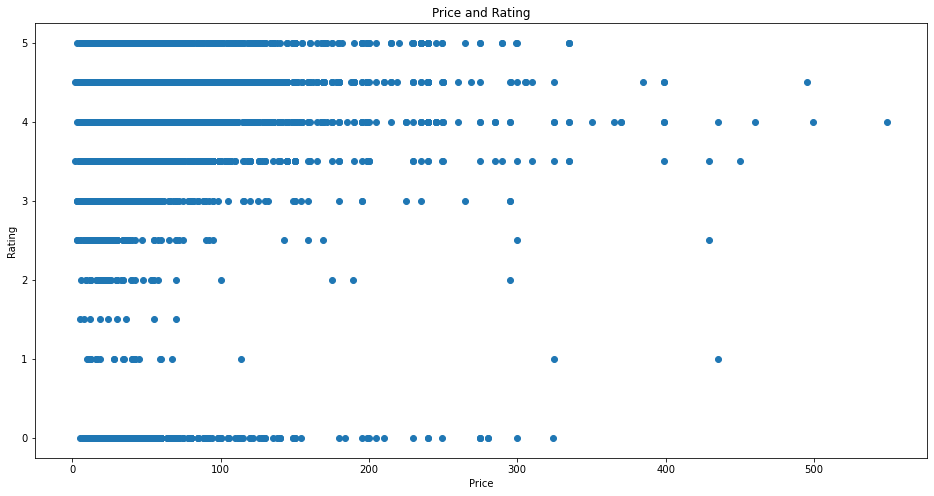

In [66]:
x = data.price
y = data.rating
fig = plt.figure(figsize=[16,8])
plt.scatter(x,y)
plt.title('Price and Rating')  
plt.xlabel('Price')  
plt.ylabel('Rating') 
plt.show()

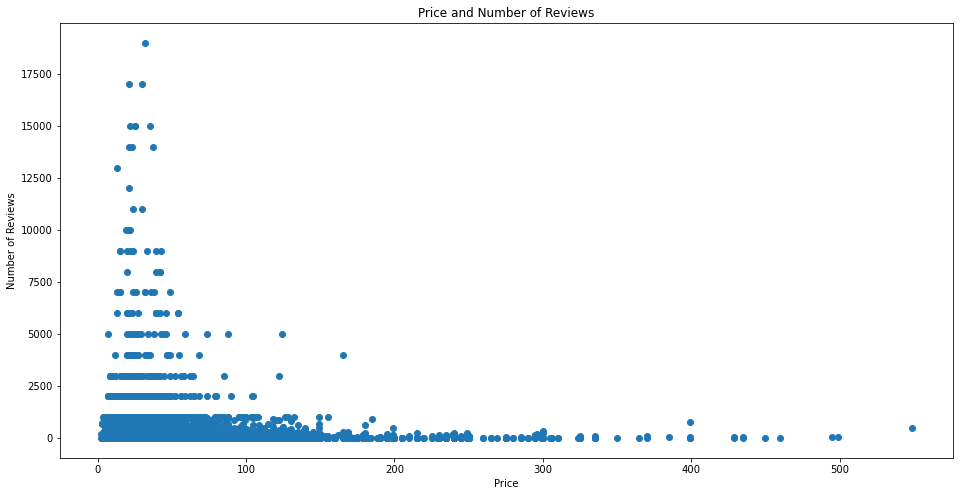

In [67]:
x = data.price
y = data.number_of_reviews
fig = plt.figure(figsize=[16,8])
plt.scatter(x,y)
plt.title('Price and Number of Reviews')  
plt.xlabel('Price')  
plt.ylabel('Number of Reviews') 
plt.show()

# Only perfume products


In [19]:
perfume = data[data['category']=='Perfume']
perfume.head()

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
5,1417609,Acqua Di Parma,Perfume,Fico di Amalfi,5 oz/ 148 mL,4.5,79,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Floral Scent Type: Fruity Fl...,no instructions,unknown,1,0,0,0
6,1638832,Acqua Di Parma,Perfume,Rosa Nobile,3.4 oz/ 101 mL,4.5,79,5000,210.0,210.0,...,True,online only,"- 0.7 oz, 20 mL Eau de Parfum Spray - 1.7 oz/...",Fragrance Family: Floral\n\nScent Type: Classi...,no instructions,unknown,1,0,0,0
9,2221596,Acqua Di Parma,Perfume,Rosa Nobile Hair Mist,1.7oz/50mL,3.0,5,2100,58.0,58.0,...,True,exclusive · online only,- 1.7oz/50mL Hair Mist,Fragrance Family: Floral\n\nScent Type: Classi...,Suggested Usage:-Spray over your hair to leave...,unknown,1,1,0,0


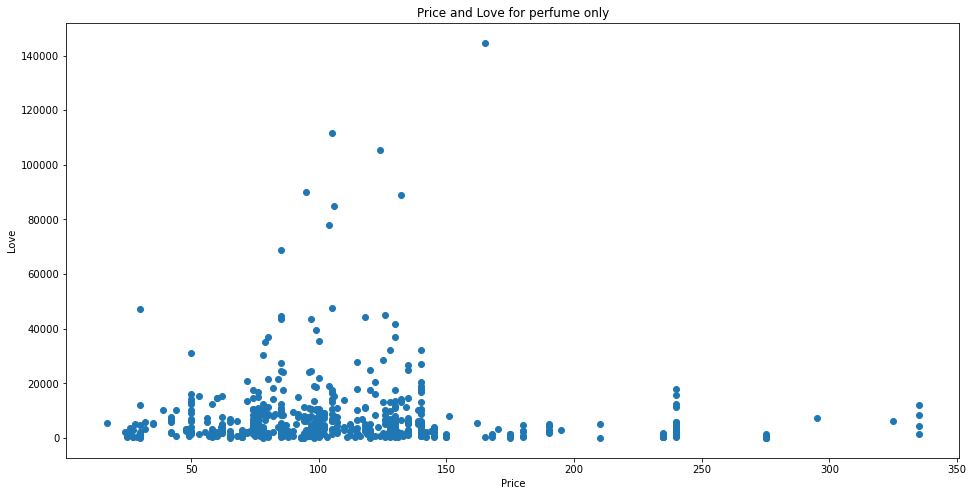

In [20]:
x = perfume.price
y = perfume.love
fig = plt.figure(figsize=[16,8])
plt.scatter(x,y)
plt.title('Price and Love for perfume only')  
plt.xlabel('Price')  
plt.ylabel('Love') 
plt.show()

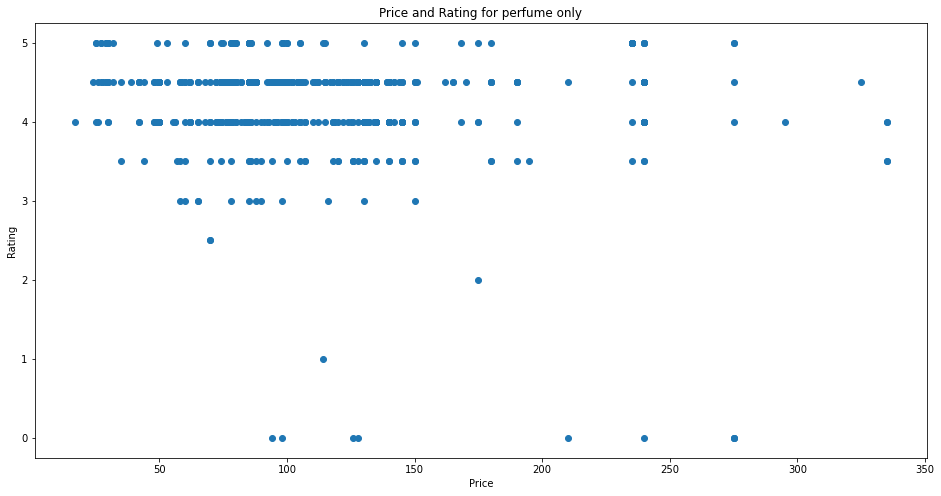

In [21]:
x = perfume.price
y = perfume.rating
fig = plt.figure(figsize=[16,8])
plt.scatter(x,y)
plt.title('Price and Rating for perfume only')  
plt.xlabel('Price')  
plt.ylabel('Rating')
plt.show()

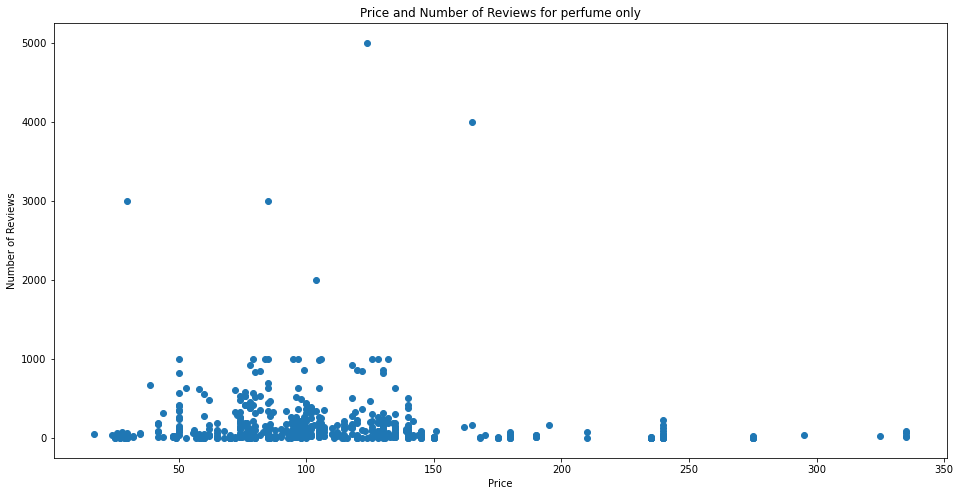

In [22]:
x = perfume.price
y = perfume.number_of_reviews
fig = plt.figure(figsize=[16,8])
plt.scatter(x,y)
plt.title('Price and Number of Reviews for perfume only')  
plt.xlabel('Price')  
plt.ylabel('Number of Reviews')
plt.show()

In [37]:
perfume1 = pd.DataFrame({'Price':x,'love':y})
perfume1.head()

,Price,love
2,180.0,26
3,120.0,23
5,180.0,79
6,210.0,79
9,58.0,5


[[  95.76635514  311.61682243]
 [  73.         2666.66666667]
 [ 116.92115385   43.85576923]
 [  91.81818182  819.96969697]
 [ 144.5        4500.        ]]


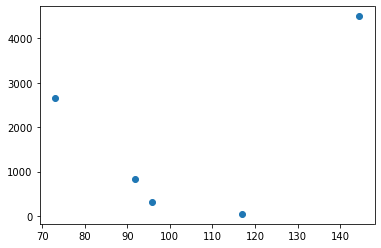

In [38]:
m1 = KMeans(5)
m1.fit(perfume1)
print(m1.cluster_centers_)
plt.scatter(m1.cluster_centers_[:,0],m1.cluster_centers_[:,1])
plt.show()

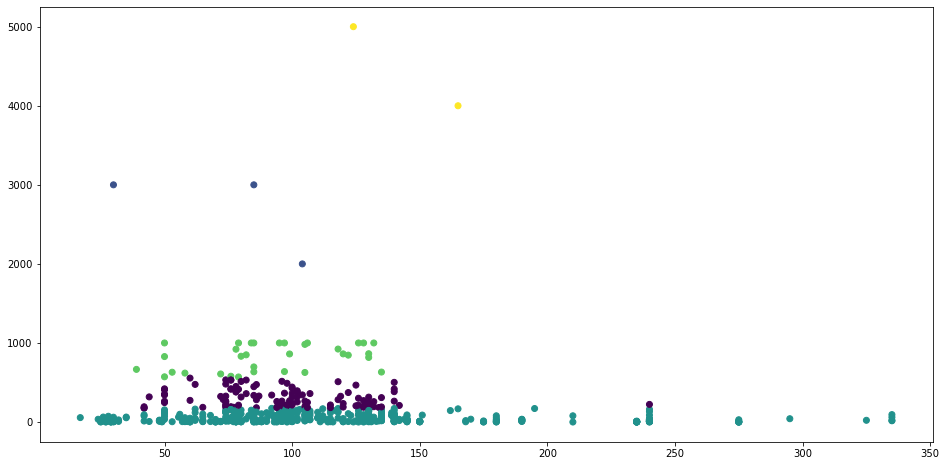

In [39]:
fig = plt.figure(figsize=[16,8])
plt.scatter(perfume1.Price,perfume1.love,c=m1.labels_)
plt.show()

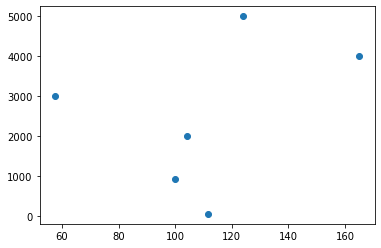

In [26]:
m2 = MeanShift()
m2.fit(perfume1)
plt.scatter(m2.cluster_centers_[:,0],m2.cluster_centers_[:,1])
plt.show()

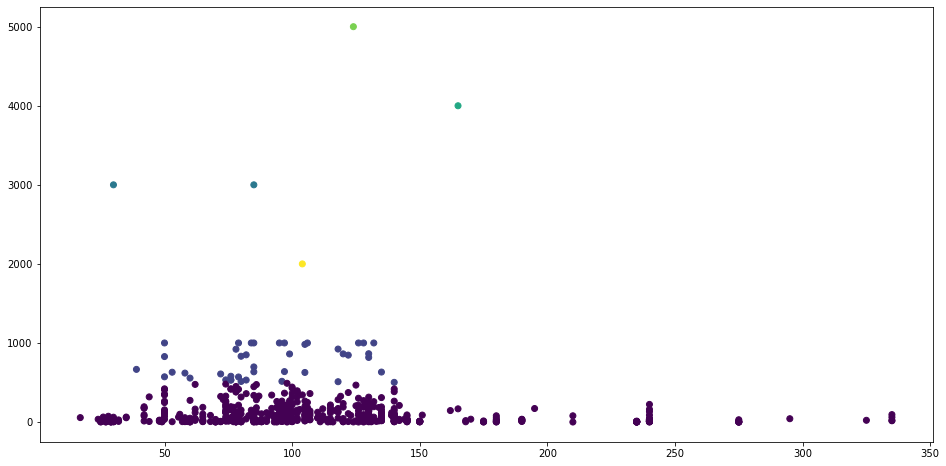

In [40]:
fig = plt.figure(figsize=[16,8])
plt.scatter(perfume1.Price,perfume1.love,c=m2.labels_)
plt.show()

## Linear regression


In [56]:
perfume = data[data['category']=='Perfume']

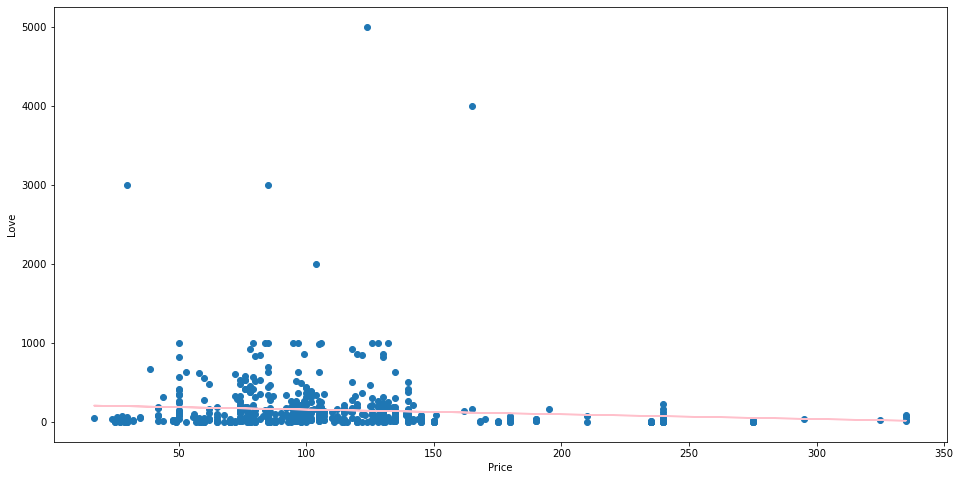

In [52]:
perfumeTable = pd.DataFrame({'price':x, 'love':y})
perfumeTable.head()
X_train = perfumeTable.iloc[:,0].values.reshape(-1,1)
y_train = perfumeTable.iloc[:,1].values.reshape(-1,1)
regr = LinearRegression()
regr.fit(X_train,y_train)
Y_pred = regr.predict(X_train)
fig = plt.figure(figsize=[16,8])
plt.scatter(X_train,y_train)
plt.plot(X_train,Y_pred, color = 'pink')
plt.xlabel('Price')  
plt.ylabel('Love') 
plt.show()

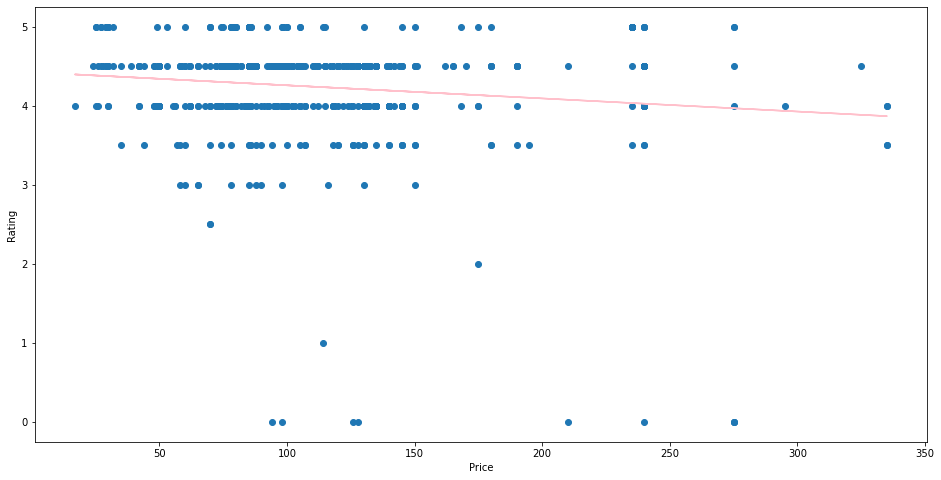

In [53]:
r = perfume.rating 
perfumeTable2 = pd.DataFrame({'price':x, 'rating':perfume.rating})
perfumeTable2.head()
X_train2 = perfumeTable2.iloc[:,0].values.reshape(-1,1)
y_train2 = perfumeTable2.iloc[:,1].values.reshape(-1,1)
regr = LinearRegression()
regr.fit(X_train2,y_train2)
Y_pred2 = regr.predict(X_train2)
fig = plt.figure(figsize=[16,8])

plt.scatter(X_train2,y_train2)
plt.plot(X_train2,Y_pred2, color = 'pink')
plt.xlabel('Price')  
plt.ylabel('Rating') 
plt.show()

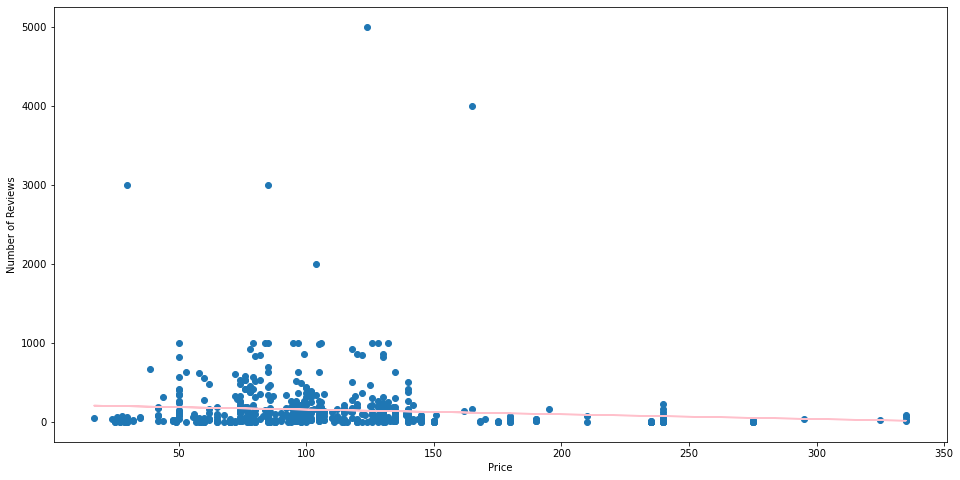

In [54]:
n = perfume.number_of_reviews
perfumeTable3 = pd.DataFrame({'price':x, 'Num of Reviews':n})
perfumeTable3.head()
X_train3 = perfumeTable3.iloc[:,0].values.reshape(-1,1)
y_train3 = perfumeTable3.iloc[:,1].values.reshape(-1,1)
regr = LinearRegression()
regr.fit(X_train3,y_train3)
Y_pred3 = regr.predict(X_train3)
fig = plt.figure(figsize=[16,8])
plt.xlabel('Price')  
plt.ylabel('Number of Reviews') 
plt.scatter(X_train3,y_train3)
plt.plot(X_train3,Y_pred3, color = 'pink')
plt.show()

## the whole dataset linear regression

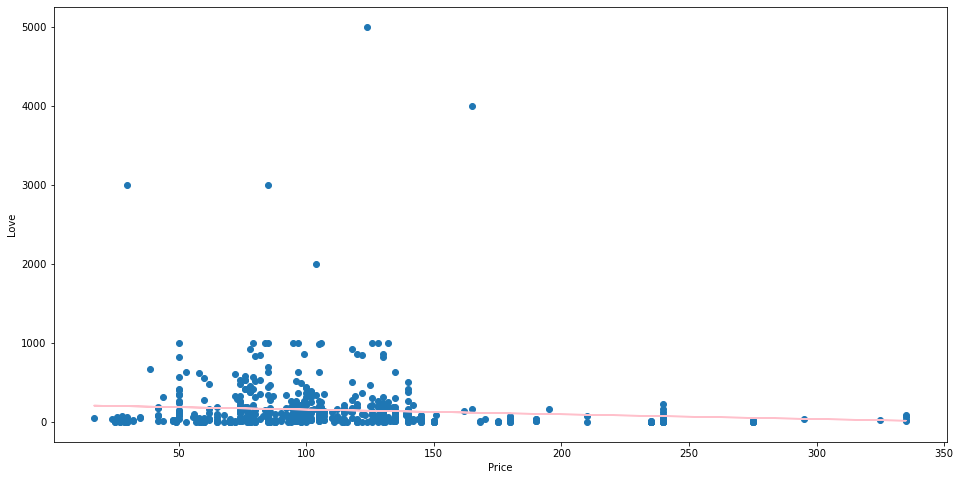

In [59]:
data1 = pd.DataFrame({'price':x, 'love':y})
X_train = data1.iloc[:,0].values.reshape(-1,1)
y_train = data1.iloc[:,1].values.reshape(-1,1)
regr = LinearRegression()
regr.fit(X_train,y_train)
Y_pred = regr.predict(X_train)
fig = plt.figure(figsize=[16,8])
plt.scatter(X_train,y_train)
plt.plot(X_train,Y_pred, color = 'pink')
plt.xlabel('Price')  
plt.ylabel('Love') 
plt.show()

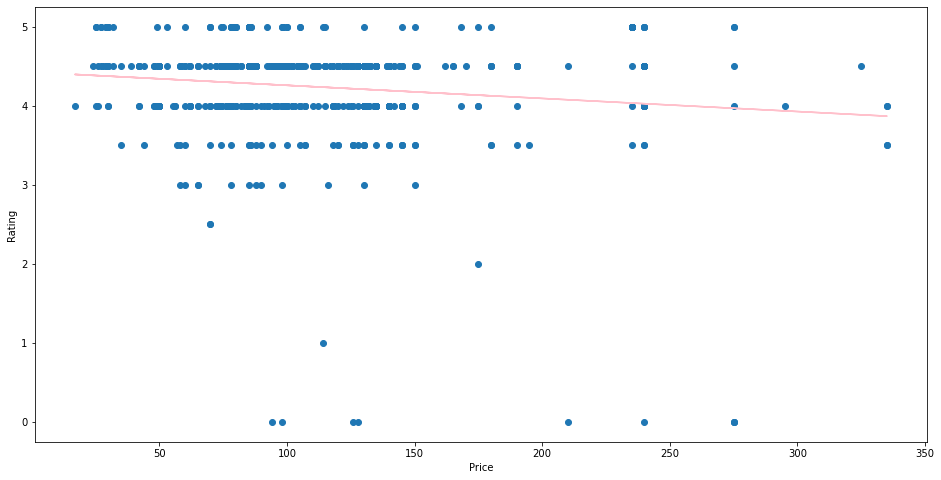

In [61]:
r = data.rating 
data2 = pd.DataFrame({'price':x, 'rating':r})
data2.head()
X_train2 = perfumeTable2.iloc[:,0].values.reshape(-1,1)
y_train2 = perfumeTable2.iloc[:,1].values.reshape(-1,1)
regr = LinearRegression()
regr.fit(X_train2,y_train2)
Y_pred2 = regr.predict(X_train2)
fig = plt.figure(figsize=[16,8])

plt.scatter(X_train2,y_train2)
plt.plot(X_train2,Y_pred2, color = 'pink')
plt.xlabel('Price')  
plt.ylabel('Rating') 
plt.show()

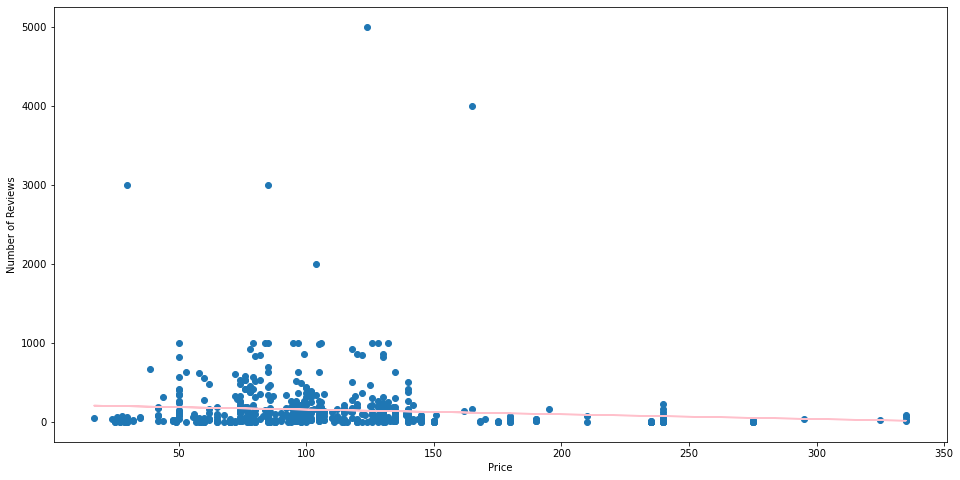

In [84]:
n = data.number_of_reviews
data3 = pd.DataFrame({'price':x, 'Num of Reviews':n})
data3.head()
X_train3 = perfumeTable3.iloc[:,0].values.reshape(-1,1)
y_train3 = perfumeTable3.iloc[:,1].values.reshape(-1,1)
regr = LinearRegression()
regr.fit(X_train3,y_train3)
Y_pred3 = regr.predict(X_train3)
fig = plt.figure(figsize=[16,8])
plt.xlabel('Price')  
plt.ylabel('Number of Reviews') 
plt.scatter(X_train3,y_train3)
plt.plot(X_train3,Y_pred3, color = 'pink')
plt.show()

Coefficients: 
 [[-0.60009481]]


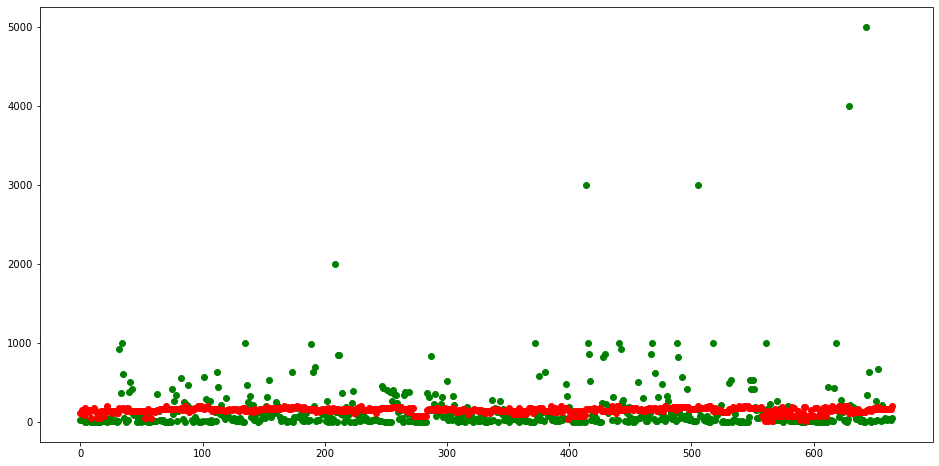

In [87]:
print('Coefficients: \n', regr.coef_)
fig=plt.figure(figsize=(16, 8))
plt.scatter(range(len(y_train3)), y_train3, color='green')
plt.scatter(range(len(Y_pred3)), Y_pred3, color='red')
plt.show()